In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import quad
%matplotlib inline
from importlib import reload
import Thermodynamics
reload(Thermodynamics)
from Thermodynamics import *

from cpclasses.PlotTools import *

Accepted 89 out of 99 samples: 89.9% acceptance rate
Accepted 877 out of 999 samples: 87.8% acceptance rate
Accepted 8777 out of 9999 samples: 87.8% acceptance rate
Accepted 89663 out of 99999 samples: 89.7% acceptance rate


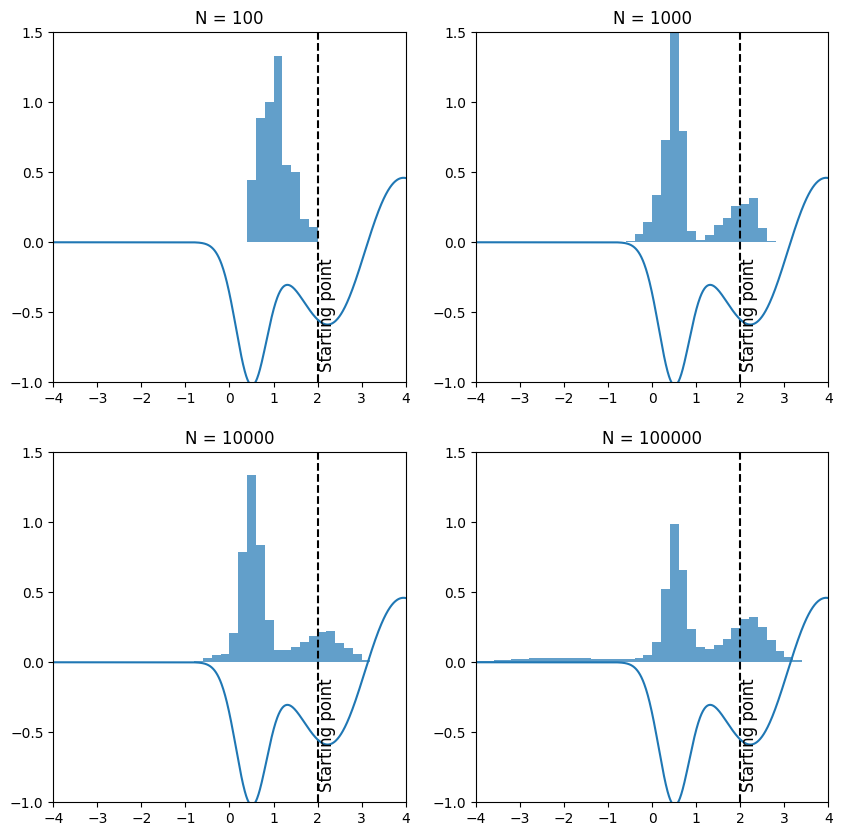

In [24]:
a,b = [0.5,0.5]
#Make this potential equal to 100 below -4 and above 4 and make it work for arrays:
def custom_potential(x):
    potential = np.sin(x) * (- np.exp(-a*(x-3)**2)) - np.exp(-((x-0.5)/b)**2)
    potential = np.where(x < -4, 100, potential)
    potential = np.where(x > 4, 100, potential)
    return potential

CustomPotential_RW = Potential(V = custom_potential, kT = 0.25, x_range = [-4, 4], N_bins = 40, type = 'Custom', delta_x = 0.1, method= 'Random Walk')

Ns_for_MCMC = np.logspace(2,5 , 4)
fig, axs = plt.subplots(2,2, figsize=(10,10))


initial_point = 2
for N, ax in zip(Ns_for_MCMC, axs.flatten()):
    ax.axvline(x=initial_point, color='black', linestyle='--', label='Starting point')
    ax.text(x=initial_point, y=-0.9, s='Starting point', fontsize=12, color='black', rotation=90)

    ax.set(xlim=(-4, 4), ylim=(-1, 1.5))
    CustomPotential_RW.plot_mcmc(ax, N = int(N), initial_point=initial_point)
    CustomPotential_RW.plot_V(ax)
    ax.set_title('N = {}'.format(int(N)))


save_plot(fig,'CustomPotential_RW, Varying N, 2.png')


Accepted 32 out of 99 samples: 32.3% acceptance rate
Accepted 293 out of 999 samples: 29.3% acceptance rate
Accepted 2963 out of 9999 samples: 29.6% acceptance rate
Accepted 29567 out of 99999 samples: 29.6% acceptance rate


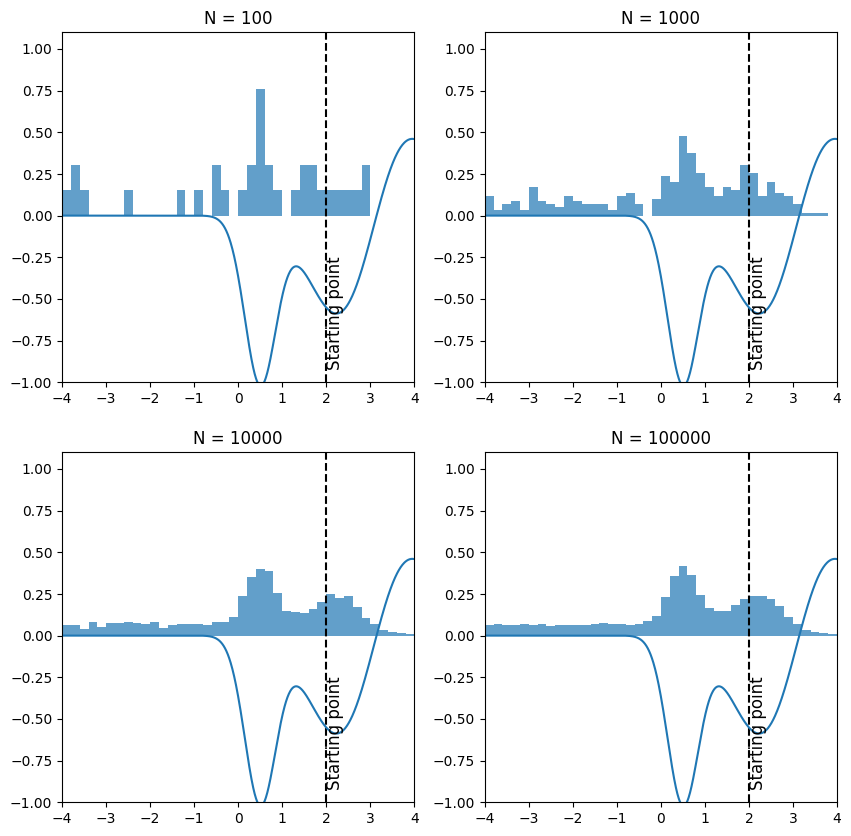

In [25]:
CustomPotential_Uniform = Potential(V= custom_potential, kT = 0.25, x_range = [-4, 4], N_bins = 40, type = 'Custom', method = 'Uniform')

Ns_for_MCMC = np.logspace(2,5 , 4)
fig, axs = plt.subplots(2,2, figsize=(10,10))


for N, ax in zip(Ns_for_MCMC, axs.flatten()):
    ax.axvline(x=initial_point, color='black', linestyle='--', label='Starting point')
    ax.text(x=initial_point, y=-0.9, s='Starting point', fontsize=12, color='black', rotation=90)
    ax.set(xlim=(-4, 4), ylim=(-1, 1.1))
    CustomPotential_Uniform.plot_mcmc(ax, N = int(N), initial_point=initial_point)
    CustomPotential_Uniform.plot_V(ax)
    ax.set_title('N = {}'.format(int(N)))


save_plot(fig,'CustomPotential_Uniform, Varying N, 2.png')